# Tori Lowery's Data Cleaning

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None, "display.max_rows", None)

# Read in csv
houses = pd.read_csv("../data/train.csv", index_col = "Id")

# Adjust MSSubClass to string
houses["MSSubClass"] = houses["MSSubClass"].astype('str')

# Convert Alley to Factor
houses["Alley"] = houses["Alley"].map(lambda x: 1 if x is True else 0)

# Bin LotConfig to impute missing LotFrontage
mean_frontage = dict(houses.groupby("LotConfig")["LotFrontage"].mean())
mean_frontage
houses.loc[pd.isna(houses["LotFrontage"]), "LotFrontage"] = houses.loc[pd.isna(houses["LotFrontage"]), "LotConfig"].replace(mean_frontage)
houses = houses.drop("LotConfig", axis = 1)

# Convert Fireplace Quality to Scale
houses["FireplaceQu"] = houses["FireplaceQu"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)

# Convert Exterior Quality and Condition to Scale
houses["ExterQual"] = houses["ExterQual"].apply(lambda x: 0 if x == "Po" else 1 if x == "Fa" else 2 if x == "TA" else 3 if x == "Gd" else 5)
houses["ExterCond"] = houses["ExterCond"].apply(lambda x: 0 if x == "Po" else 1 if x == "Fa" else 2 if x == "TA" else 3 if x == "Gd" else 5)

# Convert Basement Quality and Condition to Scale
houses["BsmtQual"] = houses["BsmtQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtCond"] = houses["BsmtCond"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtExposure"] = houses["BsmtExposure"].apply(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
houses["BsmtFinType1"] = houses["BsmtFinType1"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
houses["BsmtFinType2"] = houses["BsmtFinType2"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

# Convert Heating, Kitchen, and Garage Quality and Finish to Scale
houses["HeatingQC"] = houses["HeatingQC"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["KitchenQual"] = houses["KitchenQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageQual"] = houses["GarageQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageFinish"] = houses["GarageFinish"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)

# Feature Engineer total Porch/Deck Area
houses["TotalPorchSqft"] = houses["WoodDeckSF"] + houses["OpenPorchSF"] + houses["EnclosedPorch"] + houses["3SsnPorch"] + houses["ScreenPorch"]

# Drop Rows with NA (9 total) from Electrical, MasVnrType, and MasVnrArea
houses = houses[~pd.isna(houses["Electrical"])]
houses = houses[~pd.isna(houses["MasVnrType"])]

# Drop Columns
houses = houses.drop(["MiscFeature", "Fence", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
                      "PoolArea", "PoolQC", "GarageCond", 
                      "GarageCars", "BsmtFinSF1", "BsmtFinSF2"], axis=1)

houses.dtypes
# dict(houses.isna().sum())
houses.head(10)
# houses.shape

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,PavedDrive,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorchSqft
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000,8450,Pave,0,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,1,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,5,Attchd,2003.0,2,548,3,Y,0,2,2008,WD,Normal,208500,61
2,20,RL,80.000000,9600,Pave,0,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,1,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,2,460,3,Y,0,5,2007,WD,Normal,181500,298
3,60,RL,68.000000,11250,Pave,0,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,1,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,2,608,3,Y,0,9,2008,WD,Normal,223500,42
4,70,RL,60.000000,9550,Pave,0,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,1,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,642,3,Y,0,2,2006,WD,Abnorml,140000,307
5,60,RL,84.000000,14260,Pave,0,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,1,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,2,836,3,Y,0,12,2008,WD,Normal,250000,276
6,50,RL,85.000000,14115,Pave,0,IR1,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Wood,4,3,1,6,1,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,Typ,0,5,Attchd,1993.0,1,480,3,Y,700,10,2009,WD,Normal,143000,390
7,20,RL,75.000000,10084,Pave,0,Reg,Lvl,AllPub,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,3,2,PConc,5,3,3,6,1,317,1686,GasA,5,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,Typ,1,4,Attchd,2004.0,2,636,3,Y,0,8,2007,WD,Normal,307000,312
8,60,RL,84.039801,10382,Pave,0,IR1,Lvl,AllPub,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,2,2,CBlock,4,3,2,5,4,216,1107,GasA,5,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,Typ,2,3,Attchd,1973.0,2,484,3,Y,350,11,2009,WD,Normal,200000,667
9,50,RM,51.000000,6120,Pave,0,Reg,Lvl,AllPub,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,2,2,BrkTil,3,3,1,1,1,952,952,GasA,4,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,Min1,2,3,Detchd,1931.0,1,468,2,Y,0,4,2008,WD,Abnorml,129900,295


## Random Forest Findings:
When the randomforest uses all columns, train score is .9784431341050297 and test score is 0.9109712507382508.

So far the best model results have been using this subset of columns:
        
        ["MSSubClass", "MSZoning", "LotFrontage", "Alley", "Utilities", "Neighborhood", "Condition1", "BldgType",
        "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "ExterCond", "BsmtExposure",
        "TotalBsmtSF", "Heating", "CentralAir", "1stFlrSF", "2ndFlrSF", "Fireplaces", "FireplaceQu", 
        "KitchenAbvGr", "KitchenQual", "GarageType", "GarageArea", "GarageQual", "SaleType", 
        "SaleCondition", "TotalPorchSqft"]
        
        with params = n_estimators=800, max_features=25
        
        train score is 0.9789596719933514
        test score is 0.904114151711287
        

In [159]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
randomForest = ensemble.RandomForestRegressor()

In [237]:
use_columns = ["MSSubClass", "MSZoning", "LotFrontage", "Alley", "Utilities", "Neighborhood", "Condition1", "BldgType",
              "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "ExterCond", "BsmtExposure", "TotalBsmtSF", "Heating", "HeatingQC", "CentralAir",
               "1stFlrSF", "2ndFlrSF", "Fireplaces", "KitchenAbvGr", "KitchenQual", "FireplaceQu", "GarageType", "GarageArea", "GarageQual", "SaleType", "SaleCondition", "TotalPorchSqft"]
X = pd.get_dummies(houses[use_columns], drop_first=True, dummy_na=True)
y = houses['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
randomForest.set_params(random_state=42, n_estimators=800, max_features=25, oob_score=True)
randomForest.fit(X_train, y_train) # fit 
randomForest.score(X_train, y_train) # accuracy 

0.9789596719933514

In [239]:
randomForest.score(X_test, y_test) 

0.904114151711287

In [241]:
randomForest.oob_score_ 

0.8434311555574577

In [244]:
feature_importance = list(zip(X_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
# pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')

In [243]:
from sklearn.model_selection import GridSearchCV
grid_para_forest = [{
    "n_estimators": [250, 500, 1000],
#     "min_samples_leaf": range(1, 10),
    "max_features": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, error_score = "raise", refit = True, scoring='accuracy', cv=5, n_jobs=-1)
# grid_search_forest.best_params_
# grid_search_forest.best_score_
# grid_search_forest

## Examine Effects of Different Number of Trees

In [327]:
n_trees_range = range(10, 1000, 100)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
#     for n_feat in n_feat_range:
    randomForest.set_params(n_estimators=n_trees, random_state=42, oob_score=True)
    randomForest.fit(X_train, y_train)
    train_error2.append(1 - randomForest.score(X_train, y_train))
    test_error2.append(1 - randomForest.score(X_test, y_test))
    oob_error.append(1 - randomForest.oob_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


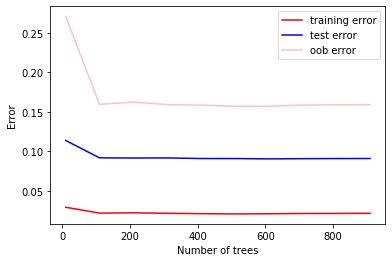

In [328]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

# Multiple Linear Regression

In [363]:
from sklearn import linear_model
from sklearn.metrics import r2_score
ols = linear_model.LinearRegression()

In [404]:
# houses.columns

In [419]:
# use_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
#        'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood',
#        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
#        'YearRemodAdd', 'RoofStyle', 'RoofMatl',
#        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
#        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
#        'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
#        'HeatingQC', 'CentralAir', 'Electrical',
#        'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
#        'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive',
#        'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
#        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
#        'ScreenPorch']
X_ = pd.get_dummies(houses.drop(["GarageYrBlt", "SalePrice"], axis=1), drop_first=True, dummy_na=True)
y_ = houses['SalePrice']
X_mlr_train, X_mlr_test, y_mlr_train, y_mlr_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [420]:
ols.fit(X_mlr_train, y_mlr_train) # fit 
ols.score(X_mlr_train, y_mlr_train) # accuracy 

0.918996045912449

In [430]:
ols.score(X_mlr_test, y_mlr_test)

0.5643007810711271

## Observe P values and conf intervals for Features

In [422]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_mlr_train)
ols3 = sm.OLS(y_mlr_train, X_add_const)
ans = ols3.fit()
# print(ans.summary())
ans.summary().tables[1]

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,coef,std err,t,P>|t|,[0.025,0.975]
const,-2.783e+06,1.27e+06,-2.188,0.029,-5.28e+06,-2.87e+05
LotFrontage,54.9306,50.219,1.094,0.274,-43.621,153.482
LotArea,0.5161,0.122,4.221,0.000,0.276,0.756
Alley,-0.0004,0.000,-2.187,0.029,-0.001,-3.98e-05
OverallQual,6708.6716,1241.684,5.403,0.000,4271.951,9145.393
OverallCond,5967.8077,1038.374,5.747,0.000,3930.068,8005.547
YearBuilt,288.2795,100.143,2.879,0.004,91.755,484.804
YearRemodAdd,13.9171,66.398,0.210,0.834,-116.385,144.219
MasVnrArea,29.0297,7.305,3.974,0.000,14.694,43.366
ExterQual,9999.6924,2049.888,4.878,0.000,5976.924,1.4e+04


## Comparing R^2 to All other Features

In [361]:
cont_features = ['LotFrontage', 'LotArea', "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", 'MasVnrArea', 
                "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                "BsmtUnfSF", "HeatingQC", 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', "BsmtFullBath", 
                'GrLivArea', "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", 
                "TotRmsAbvGrd", "Fireplaces", "FireplaceQu", 'GarageArea', "GarageFinish", "GarageArea", "GarageQual",
                "MiscVal", "MoSold", "YrSold", 'TotalPorchSqft']
scores = {}
ols2 = linear_model.LinearRegression()
for feature_name in cont_features:
    df2 = houses.copy().drop("GarageYrBlt", axis=1)
    df2 = pd.get_dummies(df2, drop_first=True, dummy_na=True)
    feature = df2[feature_name].copy()
    df2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(df2, feature)
    scores[feature_name] = ols2.score(df2, feature) 

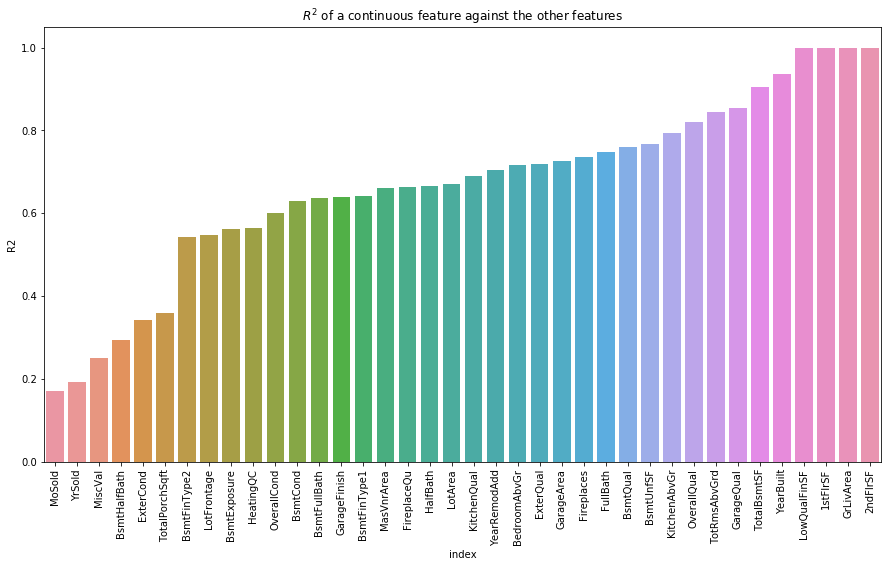

In [362]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index().sort_values(["R2"]))
plt.title('$R^2$ of a continuous feature against the other features')
for item in ax.get_xticklabels(): item.set_rotation(90)

# Visualization of Data

### 1. 1st and 2nd Floor  and Basement SQFT against Price

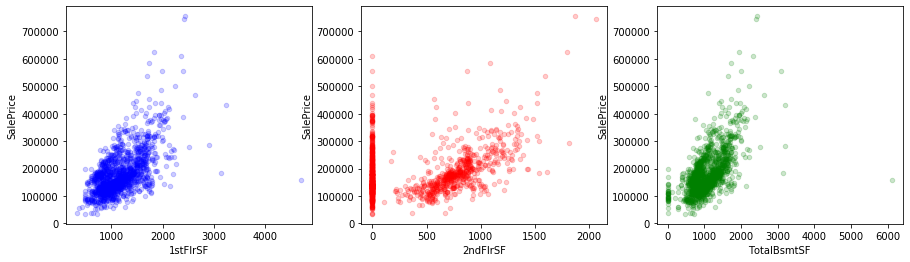

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
houses.plot(ax=axes[0], kind='scatter', x='1stFlrSF', y='SalePrice',c='b', alpha=.2)
houses.plot(ax=axes[1], kind='scatter', x='2ndFlrSF', y='SalePrice',c='r', alpha=.2)
houses.plot(ax=axes[2], kind='scatter', x='TotalBsmtSF', y='SalePrice',c='g', alpha=.2)
plt.show()

### 2. Lot Frontage, Year Built, and Year Remodelled against Price

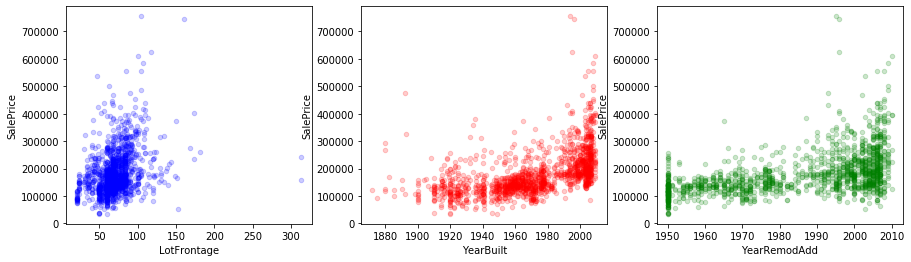

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
houses.plot(ax=axes[0], kind='scatter', x='LotFrontage', y='SalePrice',c='b',  alpha=.2)
houses.plot(ax=axes[1], kind='scatter', x='YearBuilt', y='SalePrice',c='r', alpha=.2)
houses.plot(ax=axes[2], kind='scatter', x='YearRemodAdd', y='SalePrice',c='g', alpha=.2)
plt.show()

### 3. Overall Quality against Price

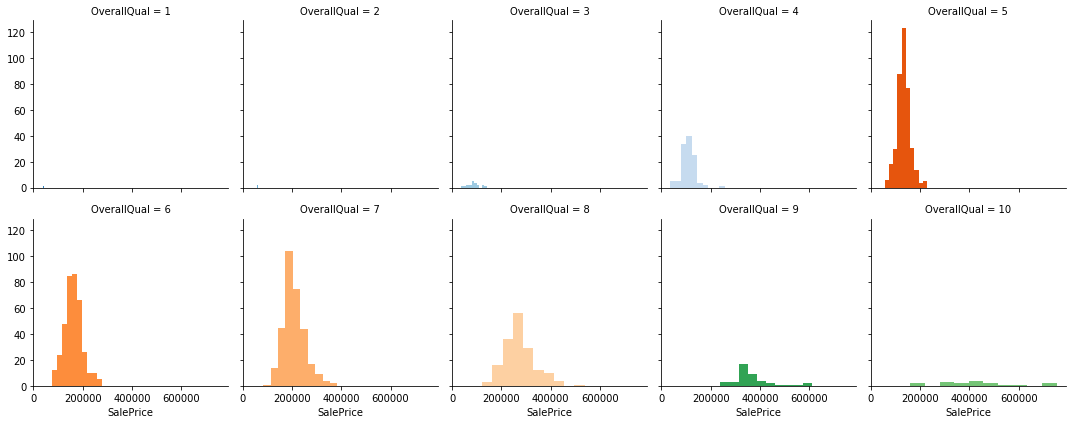

In [74]:
import seaborn as sns
g = sns.FacetGrid(data=houses, col="OverallQual", hue="OverallQual", palette="tab20c",
                     col_wrap=5, height=3)
g.map(plt.hist, "SalePrice")

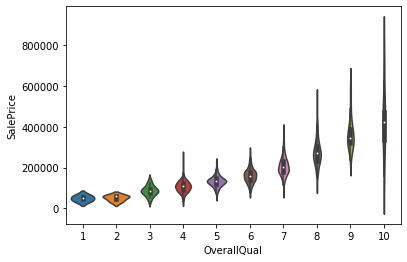

In [76]:
sns.violinplot(x="OverallQual", y="SalePrice", data=houses)

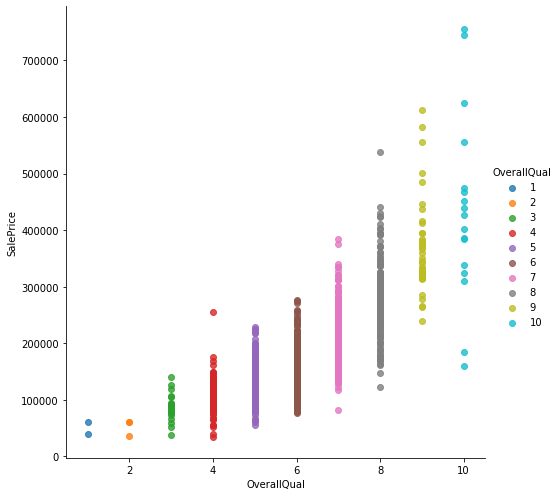

In [316]:
sns.lmplot(y="SalePrice", x="OverallQual", hue="OverallQual",
               height=7, data=houses)

### 4. MS Zoning against Price

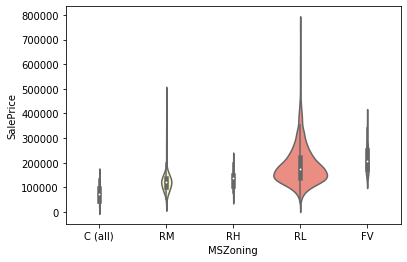

In [346]:
sns.violinplot(x="MSZoning", y="SalePrice", data=houses, palette="Set3", scale="count", order=["C (all)", "RM", "RH", "RL", "FV"])

### 5. Total Porch and Deck SQFT (feature eng.) against Price

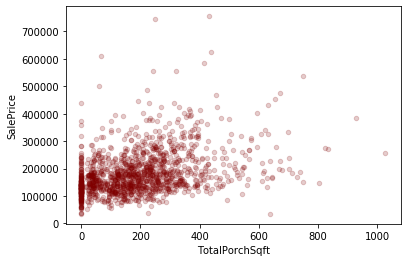

In [135]:
houses.plot(kind='scatter', x='TotalPorchSqft', y='SalePrice',c='maroon', alpha=.2)
plt.show()

### 6. Year Built grouped by Exterior Quality against Price

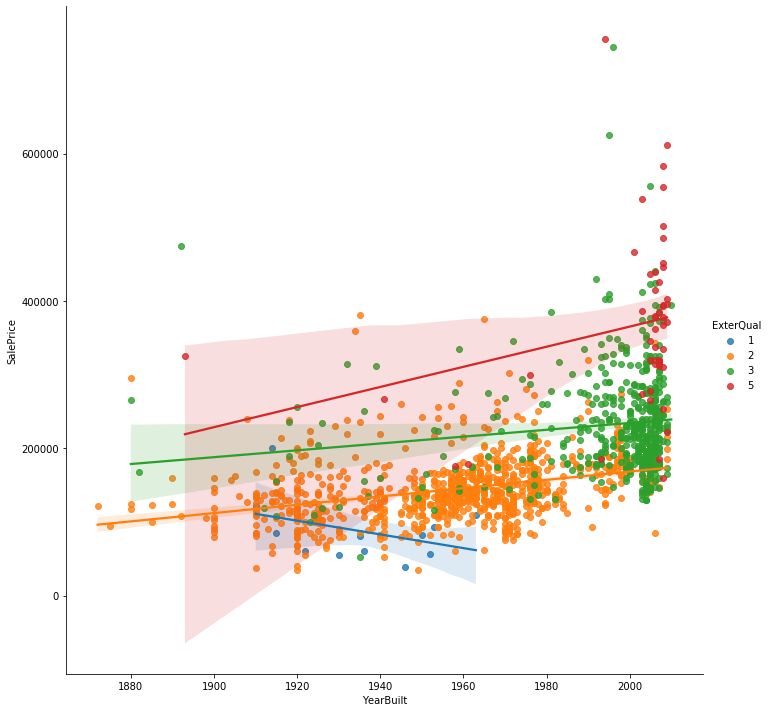

In [424]:
sns.lmplot(x="YearBuilt", y="SalePrice", hue="ExterQual",
               height=10, data=houses)

### 7. Overall Condition against Price

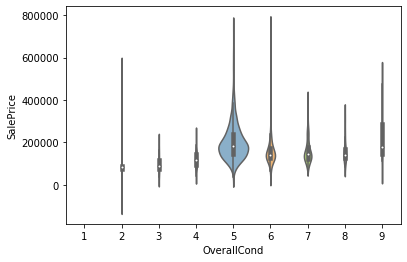

In [345]:
sns.violinplot(x="OverallCond", y="SalePrice", data=houses, palette="Set3", scale= "count")

### 8. Above Ground Living Area SQFT grouped by Overall Quality against Price

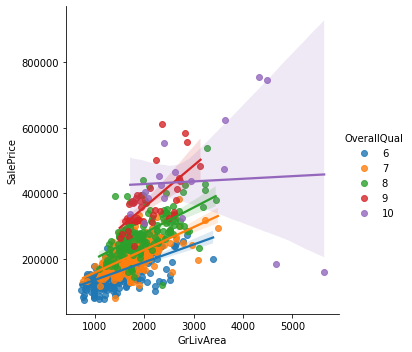

In [333]:
sns.lmplot(x="GrLivArea", y="SalePrice", hue="OverallQual",
               height=5, data=houses.loc[houses["OverallQual"] > 5])

In [343]:
# sns.lmplot(x="YearBuilt", y="SalePrice", hue="OverallCond",
#                height=5, data=houses.loc[houses["OverallCond"] == 5])

In [245]:
# houses[(houses['CentralAir'] == "N")][["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")
# houses[(houses['Alley'] == "Grvl")].plot.bar()#[["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")

In [246]:
# houses['CentralAir'].hist()

In [247]:
# houses.groupby(["BsmtFinType1", "MSSubClass"])[["MSSubClass"]].count().plot.bar(figsize = (15, 5))

In [248]:
# houses[(houses["PoolArea"] != 0)]["SalePrice"]

In [249]:
# houses["SalePrice"].mean()

In [250]:
# gargqual = houses.replace(np.nan, "NA").groupby(["GarageQual"])["GarageQual"].count()
# gargfin = houses.replace(np.nan, "NA").groupby(["GarageFinish"])["GarageFinish"].count()
# plt.bar(x=gargqual.index, height=gargqual.values)

In [251]:
# houses.groupby("MasVnrType")[["MasVnrType"]].count().plot.bar()
# houses["AvgMasArea"] = houses.cut("MasVnrArea", 20)
# houses[["MasVnrArea", "SalePrice"]].plot.scatter(x="MasVnrArea" , y="SalePrice" )

In [252]:
# houses["YearBuilt"].sort_values(ascending=False)